# Importing libraries

In [1]:
import pandas as pd
import numpy as np
import os, sys
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')


from numpy import log
from pandas import Series
from datetime import datetime

In [2]:
df = pd.read_csv(r"C:\Users\deepa\Downloads\total_energy_consumption.csv")
df.tail()

,Year,World,OECD,G7,BRICS,Europe,European Union,Belgium,Czechia,France,...,Africa,Algeria,Egypt,Nigeria,South Africa,Middle-East,Iran,Kuwait,Saudi Arabia,United Arab Emirates
30,2020.0,"13,966","4,976","3,504","5,561","1,704","1,311",51.0,40.0,218.0,...,816.0,60.0,88.0,159.0,132.0,798.0,264.0,39.0,230.0,83.0
31,2021.0,"14,647","5,197","3,669","5,880","1,784","1,374",56.0,43.0,234.0,...,845.0,64.0,95.0,165.0,128.0,823.0,271.0,44.0,234.0,83.0
32,2022.0,"14,951","5,180","3,663","6,059","1,713","1,313",51.0,43.0,212.0,...,869.0,66.0,96.0,167.0,122.0,852.0,276.0,48.0,254.0,87.0
33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Extracting world data from all data
df_world = df[['Year','World']]

In [4]:
# Removing null values
df_world = df_world.dropna(how='any')

In [5]:
#Checking Null Values
df_world.isnull().sum()

Year     0
World    0
dtype: int64

In [6]:
df_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    33 non-null     float64
 1   World   33 non-null     object 
dtypes: float64(1), object(1)
memory usage: 792.0+ bytes


In [7]:
#Changing data type of year column into datetime 
df_world['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [8]:
df_world.head()

,Year,World
0,1990-01-01,"8,734"
1,1991-01-01,"8,788"
2,1992-01-01,"8,796"
3,1993-01-01,"8,884"
4,1994-01-01,"8,957"


In [9]:
df_world['World'] = df_world['World'].str.replace(',', '')
df_world['World'] = pd.to_numeric(df_world['World']).astype(int)

In [10]:
df_world.head()

,Year,World
0,1990-01-01,8734
1,1991-01-01,8788
2,1992-01-01,8796
3,1993-01-01,8884
4,1994-01-01,8957


In [11]:
# setting index for year column
df_world.set_index('Year',inplace=True)

In [12]:
df_world.head()

,World
Year,
1990-01-01,8734
1991-01-01,8788
1992-01-01,8796
1993-01-01,8884
1994-01-01,8957


<function matplotlib.pyplot.show(close=None, block=None)>

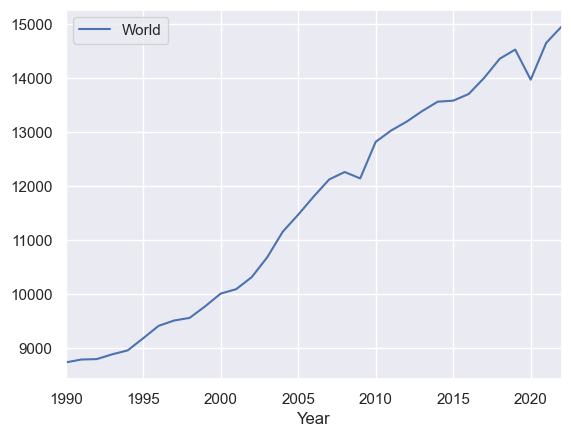

In [13]:
#plotting the data to check trend and seasonality
df_world.plot()
plt.show

### As we can out data have upward trend and no seasonality

## Decomposition to check dataset pattern/component

In [14]:
# importing libraries for decomposition
from statsmodels.tsa.seasonal import seasonal_decompose

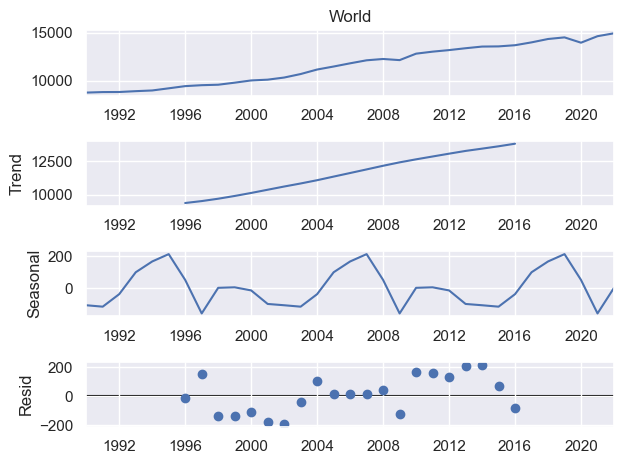

In [15]:
decomposition = seasonal_decompose(df_world['World'],model='additive',period=12) 
decomposition.plot() 
plt.show()

In [16]:
# Check wheather autocorrealtion there in the dataset or not
import statsmodels.api as sm
sm.stats.durbin_watson(df_world['World'])

0.009161260232201481

In [17]:
# Importing augemnted decayfuller test 
from statsmodels.tsa.stattools import adfuller

In [18]:
adfuller(df_world['World'])

(0.027458086022509532,
 0.9607447949951587,
 2,
 30,
 {'1%': -3.6699197407407405,
  '5%': -2.9640707407407407,
  '10%': -2.621171111111111},
 306.7511391760175)

In [19]:
# Function for checking the stability of trend and seasonality using augmented decay fuller test
def adf_check(timeseries):
    result = adfuller(timeseries)
    print("************* Augmented Decay Fuller Test ****************")
    labels = ['ADF Stats Test','p-value','no. of lags','no. of observations']
    
    for a,b in zip(result, labels):
        print(b + " : " + str(a))
        
    if result[1] <= 0.05:
        print("Strong evidence against null hypothesis and my time series is stationary")
    else:
        print('Weak evidence against null hypothesis and my time series is Non stationary')
    

In [20]:
adf_check(df_world['World'])

************* Augmented Decay Fuller Test ****************
ADF Stats Test : 0.027458086022509532
p-value : 0.9607447949951587
no. of lags : 2
no. of observations : 30
Weak evidence against null hypothesis and my time series is Non stationary


In [21]:
df_world['1st diff'] = df_world['World'] - df_world['World'].shift(1)

In [22]:
df_world.head()

,World,1st diff
Year,,
1990-01-01,8734,NaN
1991-01-01,8788,54.0
1992-01-01,8796,8.0
1993-01-01,8884,88.0
1994-01-01,8957,73.0


In [23]:
adf_check(df_world['1st diff'].dropna())

************* Augmented Decay Fuller Test ****************
ADF Stats Test : -1.5272973532281544
p-value : 0.5199671205717319
no. of lags : 10
no. of observations : 21
Weak evidence against null hypothesis and my time series is Non stationary


In [24]:
df_world['2nd diff'] = df_world['1st diff'] - df_world['1st diff'].shift(1)

In [25]:
adf_check(df_world['2nd diff'].dropna())

************* Augmented Decay Fuller Test ****************
ADF Stats Test : -1.750380428707818
p-value : 0.40535952948370707
no. of lags : 9
no. of observations : 21
Weak evidence against null hypothesis and my time series is Non stationary


In [26]:
df_world['3rd diff'] = df_world['2nd diff'] - df_world['2nd diff'].shift(1)

In [27]:
adf_check(df_world['3rd diff'].dropna())

************* Augmented Decay Fuller Test ****************
ADF Stats Test : -1.9556561114908435
p-value : 0.3063481875971387
no. of lags : 9
no. of observations : 20
Weak evidence against null hypothesis and my time series is Non stationary


In [28]:
df_world['4th diff'] = df_world['3rd diff'] - df_world['3rd diff'].shift(1)

In [29]:
adf_check(df_world['4th diff'].dropna())

************* Augmented Decay Fuller Test ****************
ADF Stats Test : -7.900724096749404
p-value : 4.19227573805087e-12
no. of lags : 7
no. of observations : 21
Strong evidence against null hypothesis and my time series is stationary


In [30]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [31]:
# Trend
# d = 4
# p = 2 -- pacf
# q = 1 -- acf

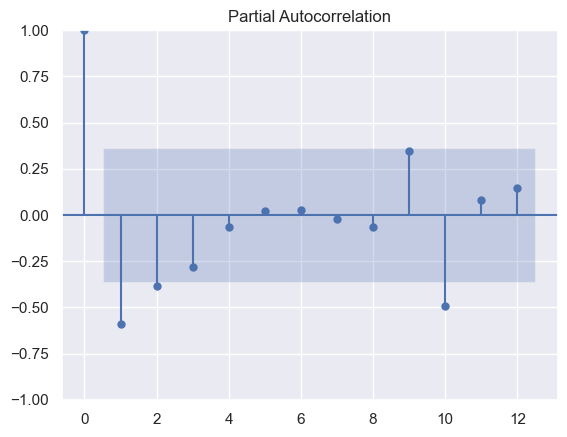

In [32]:
# plot to check p value 
plot_pacf(df_world['4th diff'].dropna(),lags=12)
plt.show()

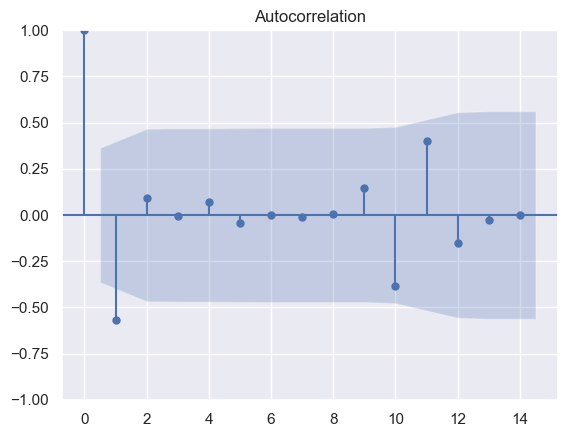

In [33]:
# plot to check q value
plot_acf(df_world['4th diff'].dropna(),lags=14)
plt.show()

In [34]:
# importing AutoReg model for prediction
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

In [35]:
# Appyling AutoReg model to predict
model = AutoReg(df_world['World'],lags=15,trend='t',period=12)

C:\Users\deepa\myenv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [36]:
result = model.fit()

In [37]:
print(result.summary())

                            AutoReg Model Results                             
Dep. Variable:                  World   No. Observations:                   33
Model:                    AutoReg(15)   Log Likelihood                 -85.374
Method:               Conditional MLE   S.D. of innovations             27.773
Date:                Mon, 17 Jul 2023   AIC                            204.749
Time:                        01:22:56   BIC                            219.885
Sample:                    01-01-2005   HQIC                           206.836
                         - 01-01-2022                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
trend       -218.7426     16.834    -12.994      0.000    -251.737    -185.748
World.L1      -0.7975      0.127     -6.264      0.000      -1.047      -0.548
World.L2       0.4080      0.085      4.800      0.0

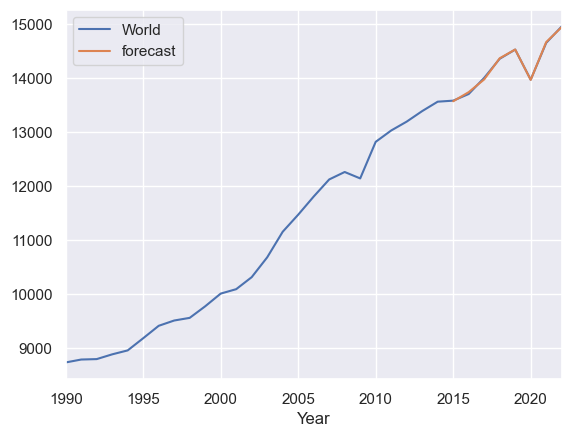

In [39]:
#Checking model performance on given data 
df_world['forecast'] = result.predict(start=25,end = 33,dynamic=True)
df_world[['World','forecast']].plot()
plt.show()

In [40]:
#Checking model performance using metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df_world contains your DataFrame with the 'World' and 'forecast' columns
y_true = df_world['World'].values[25:33]
y_pred = df_world['forecast'].values[25:33]

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_true, y_pred)
print("MAE:", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print("RMSE:", rmse)

MAE: 14.416246374568345
RMSE: 18.00286350685261


In [41]:
df_world.tail()

,World,1st diff,2nd diff,3rd diff,4th diff,forecast
Year,,,,,,
2018-01-01,14353,353.0,54.0,-122.0,-194.0,14362.147040
2019-01-01,14523,170.0,-183.0,-237.0,-115.0,14524.329928
2020-01-01,13966,-557.0,-727.0,-544.0,-307.0,13962.338640
2021-01-01,14647,681.0,1238.0,1965.0,2509.0,14661.183247
2022-01-01,14951,304.0,-377.0,-1615.0,-3580.0,14938.592806


In [42]:
from pandas.tseries.offsets import DateOffset

In [43]:
#Creating future dates 
future_dates = [df_world.index[-1] + DateOffset(years=x) for x in range(10)]

In [44]:
future_dates_df = pd.DataFrame(index=future_dates[1:],columns = df_world.columns)

In [45]:
# concatnate the both table(original table and forecast table)
future_df = pd.concat([df_world,future_dates_df])

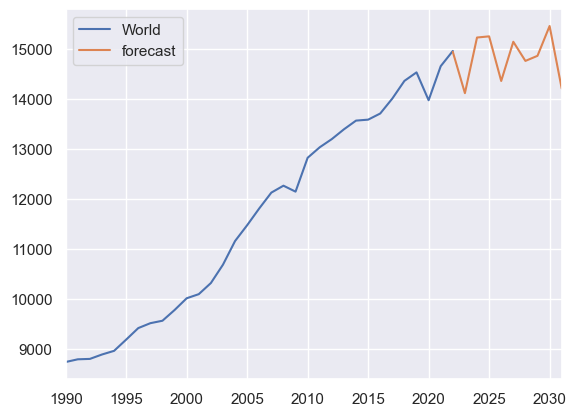

In [46]:
#Plotting prediction for next 9 years
future_df['forecast'] = result.predict(start=32,end = 44)
future_df[['World','forecast']].plot()
plt.show()

In [47]:
# Future prediction for next 9 years
future_df.tail(10)

,World,1st diff,2nd diff,3rd diff,4th diff,forecast
2022-01-01,14951,304.0,-377.0,-1615.0,-3580.0,14932.907413
2023-01-01,NaN,NaN,NaN,NaN,NaN,14107.665079
2024-01-01,NaN,NaN,NaN,NaN,NaN,15219.423279
2025-01-01,NaN,NaN,NaN,NaN,NaN,15242.883929
2026-01-01,NaN,NaN,NaN,NaN,NaN,14351.132370
2027-01-01,NaN,NaN,NaN,NaN,NaN,15134.759862
2028-01-01,NaN,NaN,NaN,NaN,NaN,14752.019986
2029-01-01,NaN,NaN,NaN,NaN,NaN,14853.789388
2030-01-01,NaN,NaN,NaN,NaN,NaN,15449.760778
2031-01-01,NaN,NaN,NaN,NaN,NaN,14202.203924
